In [9]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


In [11]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


In [12]:
Dataset=dataset.drop('c', axis=1)

In [13]:
Dataset.insert(0,'const',np.ones_like(Dataset['x']))

In [14]:
Dataset.head()

,const,x,y
0,1.0,-0.334207,2.058738
1,1.0,3.264395,5.636814
2,1.0,-0.669884,1.856185
3,1.0,1.995284,4.484924
4,1.0,3.588041,4.739172


In [19]:
class Perceptron(object):
    
    def __init__(self, data, target, w, tolerance, alpha=0.01, Max_iter=1000):
        self.data=data
        self.target=target
        self.w=w
        self.tolerance=tolerance
        self.alpha=alpha
        self.Max_iter=Max_iter
        
    def get_gradient(self, vectors, coeffs):
        '''This function computes the gradient of the loss function in the predictions'''
        return -sum([coeffs[i]*vectors[i] for i in range(len(coeffs))]) #This is the formula for the gredient of 
#the loss function

    def fit(self):
        '''This function uses the gradient given by the above get_gredient function
        to update the parameter w until we reach the desired level of accuracy in our
        predictions'''
        Norm=np.linalg.norm
        old_w=self.w+1
        num_iter=0
        while(Norm(self.w-old_w)>self.tolerance and num_iter<self.Max_iter):
            old_w=self.w
            y_hat=[np.sign(self.w.dot(np.array(self.data.iloc[i,:]))) for i in range(self.data.shape[0])]
            Misclassified_indices=[i for i in range(len(y_hat)) if y_hat[i]!=self.target[i]] # finding the indices of the misclassified
            if len(Misclassified_indices)>0:#If there are misclassified points, then we compute the gradient and update w
                gradient=self.get_gradient(np.array([self.data.iloc[j,:] for j in Misclassified_indices]), np.array([self.target[j] for j in Misclassified_indices]))
            else:
                gradient=np.zeros_like(self.data.iloc[0,:])
            self.w=self.w-self.alpha*gradient 
            num_iter += 1
            print("gradient: {} and number of misclassified: {}".format(gradient,len(Misclassified_indices))) #We print this 
        # to track the progression of the classifications. The desired stopping point is when there are no misclassified
        #points but it can come that we stop the process when the maximal number of iterations we fixed is exceeded
        return self.w

## The following plot is for a good guess of w, and requires 0 iteration.

In [20]:
w=np.array([-3.5,2,0.5]) # Guess of w, a good one actually
perceptron=Perceptron(Dataset, dataset['c'], w, tolerance=1e-6)
w=perceptron.fit()
print("Final w: {}".format(w)) # Diplaying w

gradient: [0. 0. 0.] and number of misclassified: 0
Final w: [-3.5  2.   0.5]


In [22]:
def plot_the_line(w,x):
    return (-w[0]/w[2])-(w[1]/w[2])*x

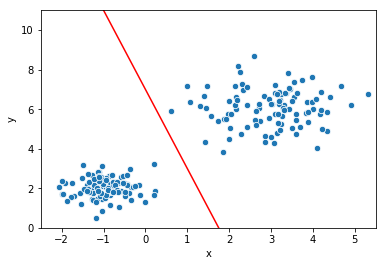

In [23]:
x=np.linspace(-3,6)
sn.scatterplot(Dataset['x'],Dataset['y'], s=40)
plt.plot(x,plot_the_line(w,x), color='red')
plt.xlim(-2.5,5.5)
plt.ylim(-0,11)
plt.show()

## Here we give an example where the classification process takes time, that is when our guess of w is not good enough

In [28]:
w=np.array([-0.5,3.2,-3.5]) # Guess of w, a good one actually
perceptron=Perceptron(Dataset, dataset['c'], w, tolerance=1e-10)
w=perceptron.fit()
print("Final w: {}".format(w)) # Diplaying w

gradient: [-100.         -297.60944397 -607.95909262] and number of misclassified: 100
gradient: [ 50.         -31.49600162 111.65158597] and number of misclassified: 50
gradient: [15.         -3.3060193  33.15182277] and number of misclassified: 15
gradient: [10.         -1.04373005 21.77613877] and number of misclassified: 10
gradient: [ 8.         -0.30457386 17.00111752] and number of misclassified: 8
gradient: [ 6.          0.3249215  11.87189999] and number of misclassified: 6
gradient: [4.         0.61620332 8.03825682] and number of misclassified: 4
gradient: [4.         0.61620332 8.03825682] and number of misclassified: 4
gradient: [4.         0.61620332 8.03825682] and number of misclassified: 4
gradient: [3.         0.62366103 6.74869708] and number of misclassified: 3
gradient: [3.         0.62366103 6.74869708] and number of misclassified: 3
gradient: [3.         0.62366103 6.74869708] and number of misclassified: 3
gradient: [3.         0.62366103 6.74869708] and number 

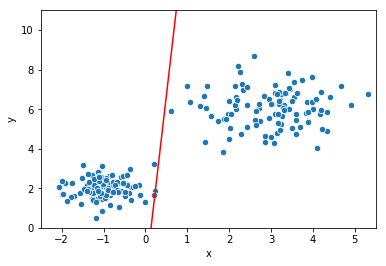

In [29]:
x=np.linspace(-3,6)
sn.scatterplot(Dataset['x'],Dataset['y'], s=40)
plt.plot(x,plot_the_line(w,x), color='red')
plt.xlim(-2.5,5.5)
plt.ylim(-0,11)
plt.show()

In [74]:
def quick_sort_helper(arr,pivot):
    for i in range(len(arr)):
        Restart=False
        if arr[i] <= arr[pivot]:
            pass
        else:
            temp = arr[i]
            arr[i] = arr[pivot-1]
            arr[pivot -1] = arr[pivot]
            arr[pivot] = temp
            Restart=True
            break
    if Restart:
        arr = quick_sort_helper(arr,pivot)
    return arr
        
            
def very_very_quick_sort(arr):
    l = len(arr)
    pivot = len(arr)-1
    for i in range(l):
        if i >= 1:
            arr[:-i] = quick_sort_helper(arr[:-i],pivot-i)
        else:
            arr = quick_sort_helper(arr,pivot-i)
    return arr

In [75]:
a= [110,4,2,7,9,2,12,-56]

In [76]:
quick_sort(a)

[-56, 2, 2, 4, 7, 9, 12, 110]

In [ ]:
locations = {'North America': {'USA': ['Mountain View']}, 'Asia': {'India': ['Bangalore']}, 'North America': {'USA': ['Atlanta']}, 'Africa': {'Egypt': 'Cairo'}, 'Asia': {'China': ['Shanghai']}}


In [5]:
ar=np.array([12.3,4,3.9])

In [6]:
ar

array([12.3,  4. ,  3.9])

In [7]:
ar[None,:]

array([[12.3,  4. ,  3.9]])

In [16]:
np.random.randn(5)

array([-0.00345667, -0.37448701, -1.33237747,  0.04661349,  1.26947331])

## Note that here again, the classification process ended well even though with our eyes we are  not convinced.

In [17]:
np.array_split()

TypeError: array_split() missing 2 required positional arguments: 'ary' and 'indices_or_sections'